In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


# Load the house prices dataset from a CSV file and display the first 5 rows to inspect the data

In [3]:
df = pd.read_csv("house_prices.csv")  # Replace with actual filename
df.head()


,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


# Perform basic exploratory data analysis:
# 1. Check data summary and missing values
# 2. Visualize distribution of the target variable (house prices)
# 3. Display correlation heatmap for numeric features to understand relationships

<class 'pandas.core.frame.DataFrame'>
Index: 169866 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   index            169866 non-null  int64  
 1   title            169866 non-null  int32  
 2   description      169866 non-null  int32  
 3   amountin_rupees  169866 non-null  int32  
 4   price_in_rupees  169866 non-null  float64
 5   location         169866 non-null  int32  
 6   carpet_area      169866 non-null  int32  
 7   status           169866 non-null  int32  
 8   floor            169866 non-null  int32  
 9   transaction      169866 non-null  int32  
 10  furnishing       169866 non-null  int32  
 11  facing           169866 non-null  int32  
 12  overlooking      169866 non-null  int32  
 13  society          169866 non-null  int32  
 14  bathroom         169866 non-null  int32  
 15  balcony          169866 non-null  int32  
 16  car_parking      169866 non-null  int32  
 

C:\Users\cheli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


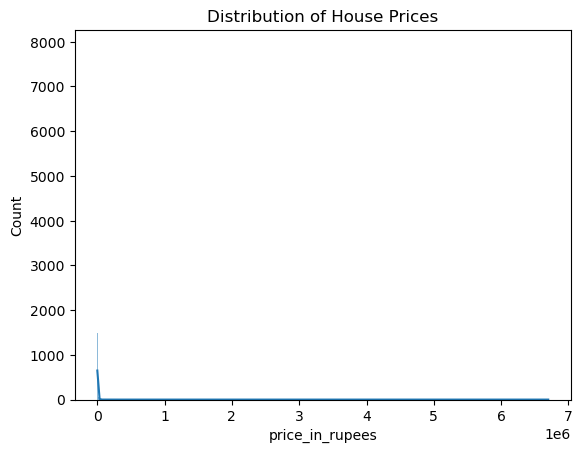

C:\Users\cheli\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


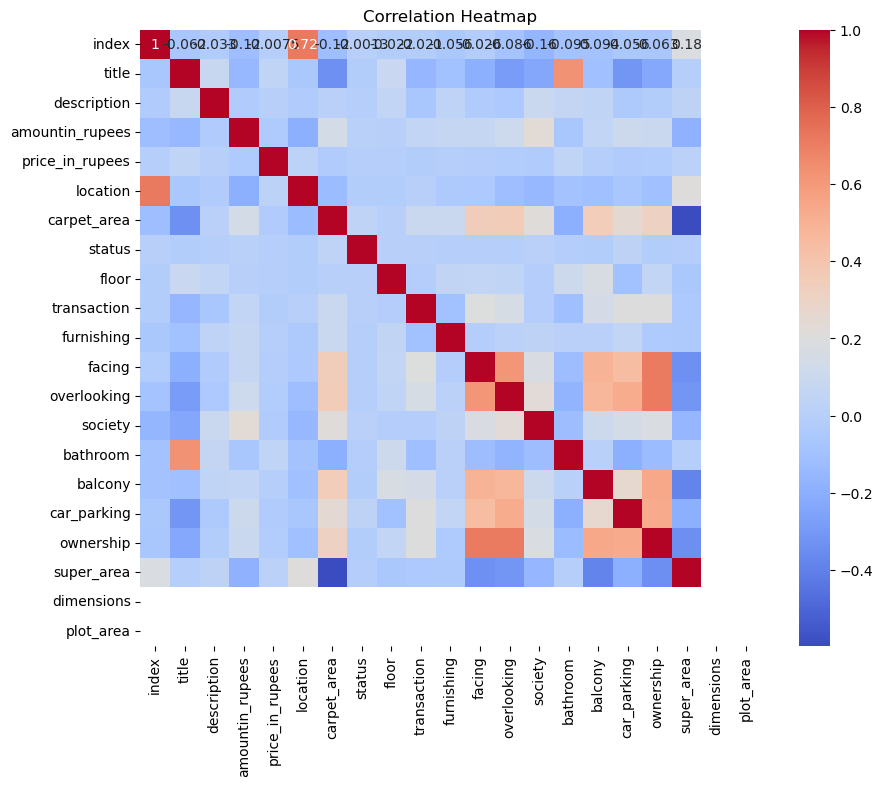

In [27]:
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False)

# Visualize target variable
sns.histplot(df['price_in_rupees'], kde=True)
plt.title("Distribution of House Prices")
plt.show()

# Correlation matrix for numeric features
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Remove unnecessary columns from the dataset to simplify analysis
# Then visualize the distribution of the updated target variable 'amountin_rupees'`

C:\Users\cheli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


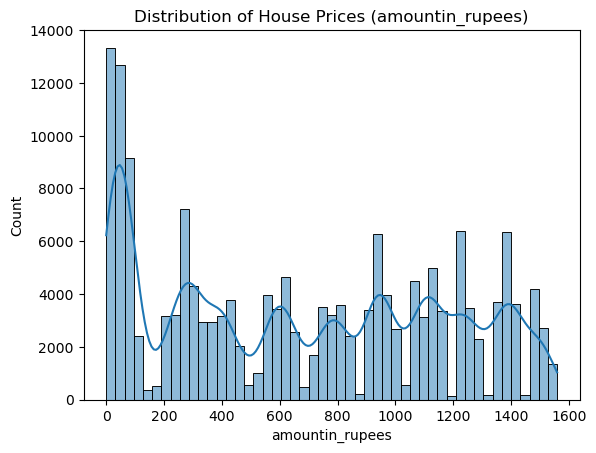

In [28]:
# Drop useless columns
df = df.drop(columns=['dimensions', 'plot_area', 'index'])

# Visualize the target variable (choose correct column)
sns.histplot(df['amountin_rupees'], kde=True)
plt.title("Distribution of House Prices (amountin_rupees)")
plt.show()


# Print the list of all column names in the DataFrame

In [32]:
print(df.columns.tolist())


['description', 'amountin_rupees', 'price_in_rupees', 'carpet_area', 'status', 'floor', 'transaction', 'furnishing', 'facing', 'overlooking', 'bathroom', 'balcony', 'car_parking', 'ownership', 'super_area']


In [33]:
['description', 'amountin_rupees', 'price_in_rupees', 'carpet_area', 'status', 'floor', 'transaction', 'furnishing', 'facing', 'overlooking', 'bathroom', 'balcony', 'car_parking', 'ownership', 'super_area']


['description',
 'amountin_rupees',
 'price_in_rupees',
 'carpet_area',
 'status',
 'floor',
 'transaction',
 'furnishing',
 'facing',
 'overlooking',
 'bathroom',
 'balcony',
 'car_parking',
 'ownership',
 'super_area']

# Step 4: Data Preprocessing
# 1. Check for missing values and handle if necessary (e.g., fill with median)
# 2. Encode categorical variables if present (not needed here)
# 3. Define features and target variable
# 4. Normalize feature columns using StandardScaler for better model performance
# 5. Convert scaled features back to a DataFrame for easier handling

In [34]:
# Step 4: Data Preprocessing

# 1. Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# 2. Since no columns have nulls (or minimal), no filling needed here.
#    But if any missing numeric values, fill with median like below (example):
# df['bathroom'].fillna(df['bathroom'].median(), inplace=True)

# 3. All columns seem numeric or already encoded, so no need for encoding categorical variables.
#    If any categorical were strings, we would encode them.

# 4. Define features and target variable
target = 'amountin_rupees'  # or 'price_in_rupees', choose one
features = df.drop(columns=[target])

# 5. Normalize features (standard scaling)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 6. Convert scaled features back to DataFrame for clarity
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

print("Data preprocessing complete.")


Missing values per column:
description        0
amountin_rupees    0
price_in_rupees    0
carpet_area        0
status             0
floor              0
transaction        0
furnishing         0
facing             0
overlooking        0
bathroom           0
balcony            0
car_parking        0
ownership          0
super_area         0
dtype: int64
Data preprocessing complete.


# Split the dataset into training and testing sets (80% train, 20% test) with a fixed random state for reproducibility
# Then print the number of samples in each set


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, df[target], test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 135892 samples
Test set size: 33974 samples


# Train three regression models on the training data:
# 1. Linear Regression (simple linear model)
# 2. Polynomial Regression (degree 2) to capture nonlinear relationships
# 3. Ridge Regression (linear model with L2 regularization to reduce overfitting)

In [38]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Polynomial Regression (degree=2)
poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly.fit(X_train, y_train)

# Ridge Regression (alpha=1.0)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


Ridge()

# Generate predictions on the test set using each trained regression model

In [39]:
y_pred_lr = lr.predict(X_test)
y_pred_poly = poly.predict(X_test)
y_pred_ridge = ridge.predict(X_test)


# Evaluate and print the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for each regression model's predictions

In [40]:
from sklearn.metrics import mean_squared_error
import numpy as np

def print_evaluation(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}")

print_evaluation(y_test, y_pred_lr, "Linear Regression")
print_evaluation(y_test, y_pred_poly, "Polynomial Regression")
print_evaluation(y_test, y_pred_ridge, "Ridge Regression")


Linear Regression - MSE: 227657.26, RMSE: 477.13
Polynomial Regression - MSE: 1062509.91, RMSE: 1030.78
Ridge Regression - MSE: 227657.23, RMSE: 477.13
